# Assignment Day 9 - Andhyka Cakrabuana Adhitama
* [Objectives](https://docs.google.com/document/d/1mfMb3BMEsrWMxLBxv_Yo5sTqJTNK5ZJOm4lLNNNp2Sw/edit?usp=sharing)
* [Github link ](https://github.com/dhykac/SpecializedBootcampBI/blob/main/Day%209%20-%20Explanatory%20Model%20Analysis%20Model%20Dependent/Assignment_Day_9_Andhyka_Cakrabuana_Adhitama.ipynb)

# Machine Learning (Basic)

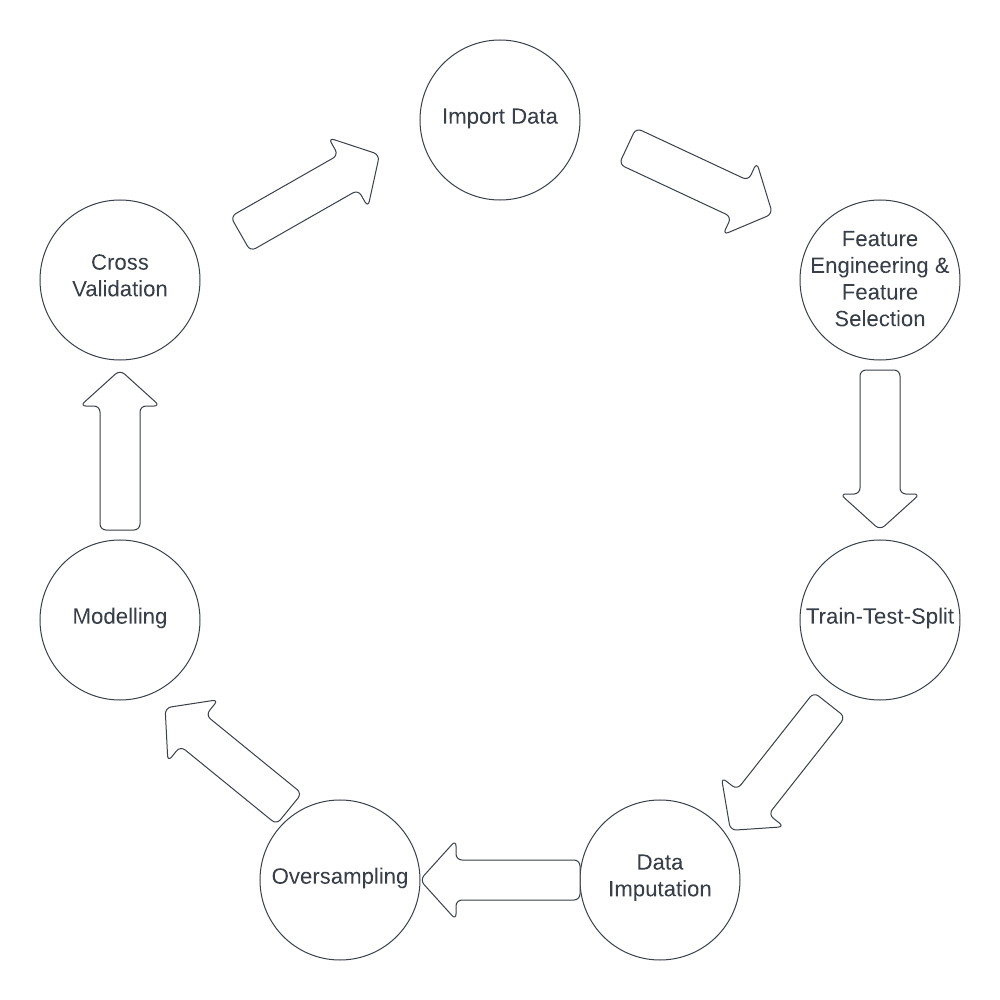

## Import Data

The first one we need to do is import the data source into our working environment. The data can be imported in various ways, but my preference is using Pandas library to import the data. The reason is that with this library we can import the data with any types, delimiter, etc. Also the step is not limited with only import, we can add more additional step like data profilling to get insights like descriptive statistics, null & duplicated values, also sample of our overall data using head() or tail()

## Feature Engineering & Selection

In this step, we take our data into another level. This step will consist of more advanced handlings like create a new feature, outlier handling, transformation, feature extraction, encoding etc. After doing an engineering to the data, then we choose what feature we will use on the modelling section. For the notes, any handling on this step **must not** contain any methods using aggregation from overall data. This because the aggregation might be cause leaked data as an impact of putting information that most likely we don't have at the present data (by any means, we take a knowledge from the "future" that we don't know yet to our data)

Reference : [Machine Learning Tutorial – Feature Engineering and Feature Selection For Beginners](https://www.freecodecamp.org/news/feature-engineering-and-feature-selection-for-beginners/#:~:text=Feature%20engineering%20refers%20to%20a,data%20in%20machine%20learning%20algorithms.)

## Train-Test-Splitting

In this step, we divide our data into two subsets: train and test. The purpose is we need to separate the data into present data (train) and data we "pretend" as future data (test). Also this step will ease us to another advanced methods like using aggregation that we couldn't do at previous steps and still have a pure data (which is test data). 

Reference : [Split a Dataset Into Training and Testing Sets with Python](https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830)

## Data Imputation

After get a train data as a playground, we can using aggregation methods to handling any anomalies on our dataset. We can using mean/median/mode to fill in null values, outliers handling using quantile boxplot, or any methods that used further knowledge of the data. This because we have splitted our knowledge the data into present data and pretended-to-be new data. Also notes, we only use this step on the train dataset and leave the test data as pure as it is.

Reference : 
* [Statistical Imputation for Missing Values in Machine Learning](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/)
* [Imputation before or after splitting into train and test?](https://stats.stackexchange.com/questions/95083/imputation-before-or-after-splitting-into-train-and-test#:~:text=You%20should%20split%20before%20pre%2Dprocessing%20or%20imputing.)

## Oversampling

At the real case, we usually didn't get a balanced data. Sometimes, we encounter an imbalance data and need an extra step to handling it. Oversampling is one of the solution. In this step we make an artificial data to make our train data balanced before going for modelling, and this step will take a dangerous impact if we do this before train-test-splitting. The reason is similiar to data imputation in which we create a random data based on pattern the machine get from present data. If we do this before train-test-splitting, that will make the real data and artificial data got mixed and most likely the results will be invalid because we put the data that totally out of nowhere.

Reference : 
* [7 Over Sampling techniques to handle Imbalanced Data](https://towardsdatascience.com/7-over-sampling-techniques-to-handle-imbalanced-data-ec51c8db349f)
* [Data balancing before test/train split or only training data balancing. which is correct?](https://www.researchgate.net/post/Data_balancing_before_test_train_split_or_only_training_data_balancing_which_is_correct#:~:text=Oversampling%20before%20splitting%20the%20data,generalization%20to%20the%20test%20data.)

## Model Selection

After we get an fully engineered and transformed train dataset, next we decide what models that match our dataset problem. Regression problem or classification problem? Is it supervised data or unsupervised data? Is the data need a complex model or classical ones? All will be answered on this step. Also in this step we need to have a comprehensive and solid knowledge about the machine learning we will be used, because our decision will determine the outcome of the models and how we deliver the insights of the models to the stakeholders regardless it data stakeholder(s) or non-data stakeholder(s).

Reference : [Model selection in machine learning](https://towardsdatascience.com/model-selection-in-machine-learning-813fe2e63ec6#:~:text=Model%20selection%20refers%20to%20the,training%20dataset%20but%20generalizes%20poorly.)

## Modelling

Next step after chosing the best model, we need train our machine learning model on the train dataset. In this step, machine learning algorithm will learn and try to figure out the pattern of our train dataset. After that, we apply the algorithm to the independent feature of our test dataset and predict the outcome. Then we compare the outcome of the prediction with the real outcome of the dataset (in which dependent feature of our test dataset) in various metrics. We also need to adjust the parameter of the model in order to get best outcome of the model, and again, domain knowledge takes place here.

Reference : [A Tour of Machine Learning Algorithms](https://towardsdatascience.com/a-tour-of-machine-learning-algorithms-466b8bf75c0a)

## Cross Validation

The last but not least, we need to evaluate the performance of our machine learning models. The technique we used to evaluate is cross validation. This technique used to make sure our model got the pattern correct, didn't pick up too much noises, and low on bias and variance. This technique also useful assess the effectiveness of the model, particularly if we need to handle overfitting and determining hyperparameter. After this step, we can decide to finish the cycle or turnback to any previously steps until we get best performance machine learning models.

Reference : [Cross-Validation in Machine Learning](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f)

# Explanatory Model Analysis : Model Dependent (Advanced)

## Import Data

### Library

In [1]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot

In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import warnings
warnings.filterwarnings('ignore')

# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot, seaborn, and plotly.express module for data visualization
import matplotlib.pyplot as plt
palette = {0: 'tab:blue',1: 'tab:orange'}
import seaborn as sns
import plotly.express as px

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load decision tree model
from sklearn.tree import DecisionTreeClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text
# load metrics
from sklearn.metrics import *

# load preprocessing module
from sklearn.preprocessing import *

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

### Load Data & Profilling

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_response_model/marketing_campaign.csv', sep=';')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
# Data Profilling
print("="*10,"Data Profilling","="*10)

# Data Shape
print("Data shape :", df.shape)
print("")

# Data Info
print("Data info :")
print(df.info())
print("")

# Data duplication
print("Data duplication :")
print(df.duplicated().sum())
print("")

========== Data Profilling ==========
Data shape : (2240, 29)

Data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds 

In [5]:
# Unique value for object column
obj_col = ['Education', 'Marital_Status']
for col in obj_col:
    print("="*10)
    print(f"Column: {col}")
    print(df[col].unique())

Column: Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Column: Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


* There are only two object columns which is `Education` and `Marital_Status`
* `Dt_Customer` column need transformed to datetime
* There are 24 rows of null values on `Income` column
* There are no duplicated values on this data

## Feature Engineering & Selection

### Missing Value handling

In [6]:
# Missing values handling
# Because of slight percent of missing values (24 rows / 1.07%), we could drop the missing values
df = df.dropna(axis=0)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Dt_Customer related transformation

In [7]:
# Change Dt_Customer to datetime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].dtypes)

datetime64[ns]


In [8]:
# Get Age and drop Year_Birth
# Since the customers enrollment with the company between 2012 and 2014, so we assume that the data was collected in January 2015 for the sake of simplicity.
# Dropping Year_Birth also for saving for normalization data.

df['Age'] = 2015 - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

In [9]:
# Age Anomalies Handling
df['Age'].loc[df['Age'].idxmax()]

122

As we can see above, there are customer with age more than 100 years. This could be because we create `Age` column based on birth year & data taken year. So probably, there are customer who have been passed away. As for the data, we will handle the anomalies using clipping (because the anomalies have similiar characteristic with outlier).

In [10]:
# Clipping age until < 100
df = df[df['Age'] < 100]
df['Age'].loc[df['Age'].idxmax()]

75

### Marital Status related transformation

In [11]:
# Marital_Status encoding
# Change to 1 for all value with partner (Together and Maried) and 0 for all value without partner (Single, Divorced, Widow, Alone, Absurd, YOLO)

df['Marital_Status'] = df['Marital_Status'].replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

### Create Total Values columns

In [12]:
# Make one column with value of total child and teen at home and drop another columns
df['Children'] = df['Kidhome'] + df['Teenhome']

In [13]:
# Make one column with value of all spendings and drop another columns
df['TotalSpendings'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [14]:
# Make one column with value of total purchases and drop another columns
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

### Drop unused columns

In [15]:
# Drop unused column
df = df.drop(['ID', 'Dt_Customer'], axis=1)

In [16]:
# Drop column with only one values
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [17]:
# Drop column with values has been sum up
df = df.drop(['Kidhome', 'Teenhome', 
              'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
              'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2213 non-null   object 
 1   Marital_Status     2213 non-null   object 
 2   Income             2213 non-null   float64
 3   Recency            2213 non-null   int64  
 4   NumWebVisitsMonth  2213 non-null   int64  
 5   AcceptedCmp3       2213 non-null   int64  
 6   AcceptedCmp4       2213 non-null   int64  
 7   AcceptedCmp5       2213 non-null   int64  
 8   AcceptedCmp1       2213 non-null   int64  
 9   AcceptedCmp2       2213 non-null   int64  
 10  Complain           2213 non-null   int64  
 11  Response           2213 non-null   int64  
 12  Age                2213 non-null   int64  
 13  Children           2213 non-null   int64  
 14  TotalSpendings     2213 non-null   int64  
 15  TotalPurchases     2213 non-null   int64  
dtypes: float64(1), int64(13)

## Exploratory Data Analysis (Answer for Advanced question No.1)

In [19]:
# Marital counts exploration
maritalstatus = df['Marital_Status'].value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

Insight : 
The company have 35.4% Single customer (784) and 64.6% Partner customer (1429)

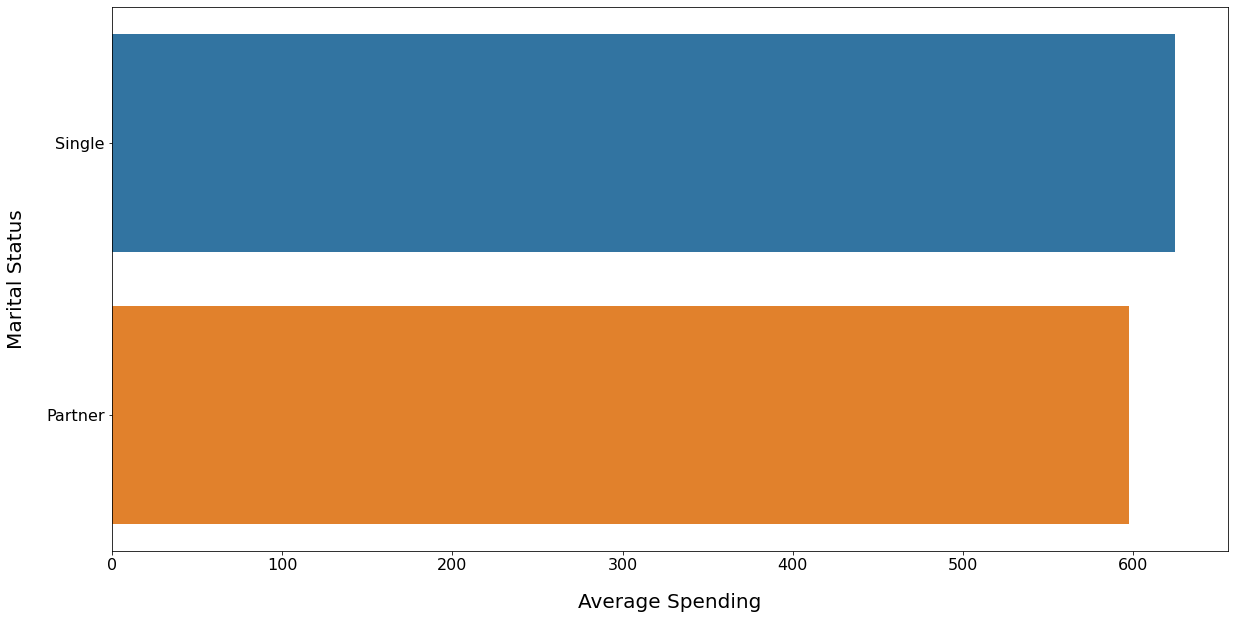

In [20]:
# Marital & Spendings Relationship
maritalspending = df.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Marital Status', fontsize=20, labelpad=20);

Insights :
Despite the company have more Partner customer, the Single customer most likely spend more than Partner customer.

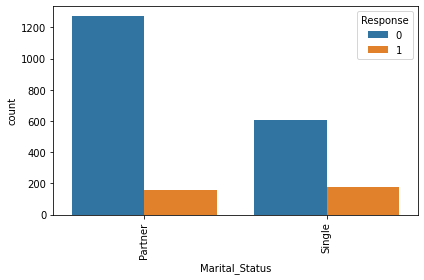

In [21]:
# Marital Status vs Response
sns.countplot(df['Marital_Status'], hue=df['Response'], palette=palette, order = df['Marital_Status'].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout();

Insight :
Single and Partner customer have most likely equal number

In [22]:
education = df['Education'].value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

Insight :
Half of the total customer of the company have Graduation degree (1116)

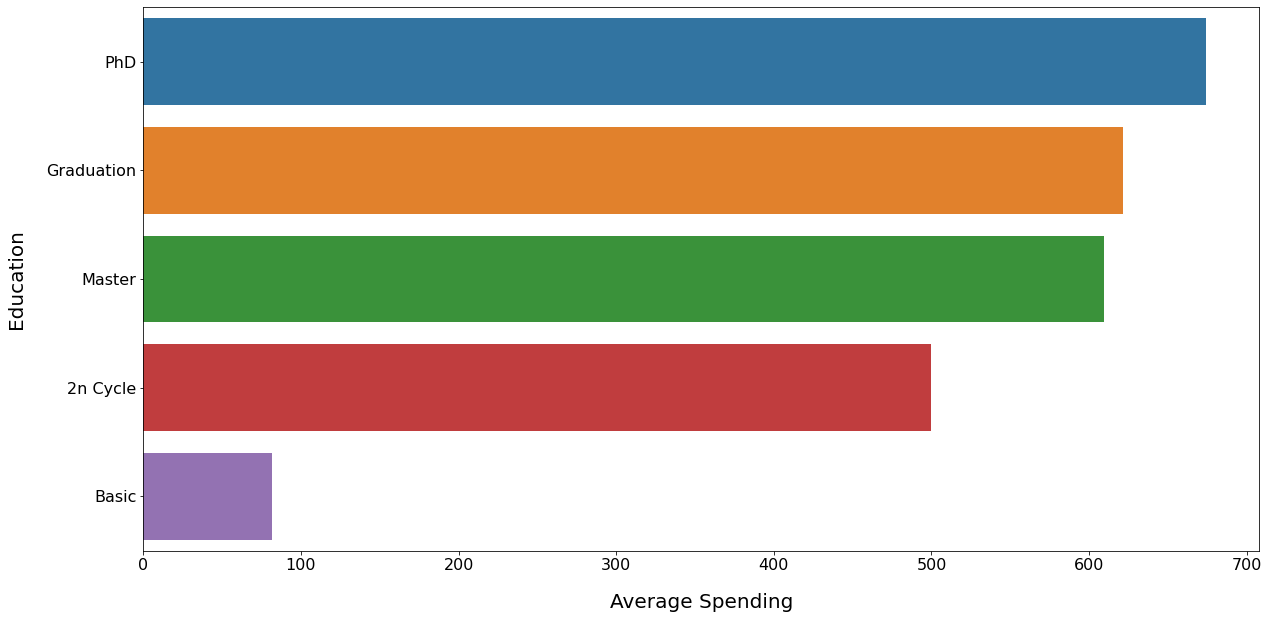

In [23]:
educationspending = df.groupby('Education')['TotalSpendings'].mean().sort_values(ascending=False)
educationspending_df = pd.DataFrame(list(educationspending.items()), columns=['Education', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = educationspending_df, x="Average Spending", y="Education");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Education', fontsize=20, labelpad=20);

Insight : Despite half of customer have most number, the average spending of PhD customer are the highest

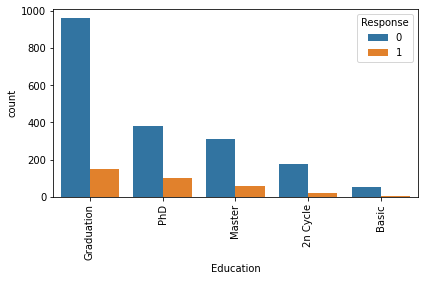

In [24]:
# Education vs Response
sns.countplot(df['Education'], hue=df['Response'], palette=palette, order = df['Education'].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout();

Insight :
Graduation customer most likely responding to the campaign

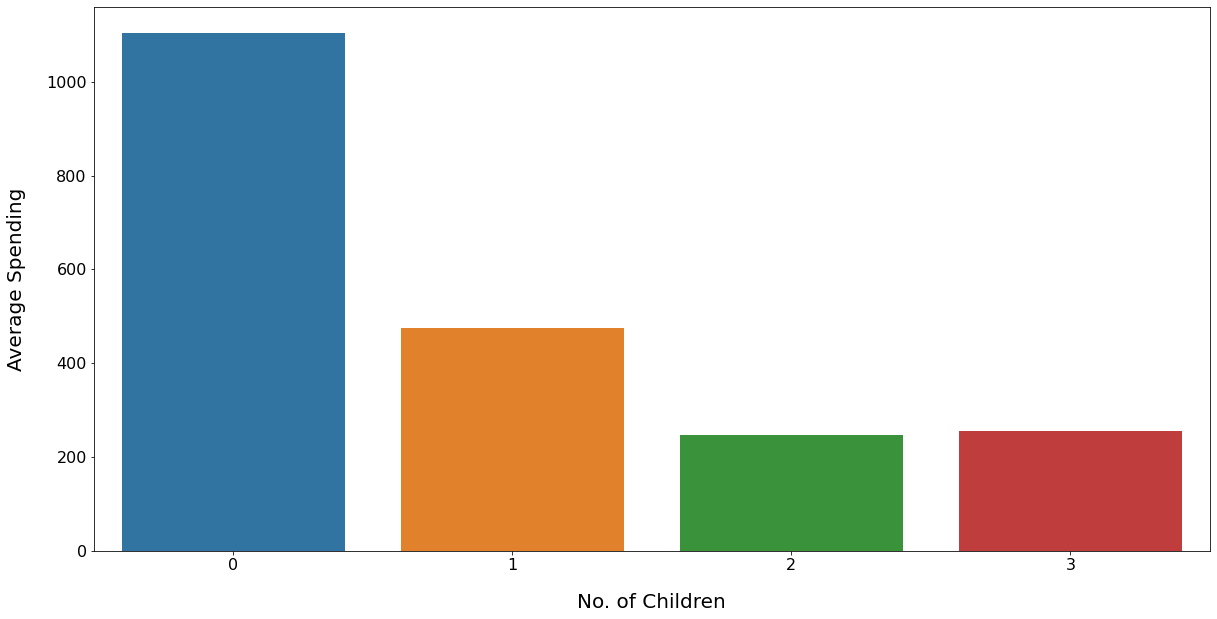

In [25]:
# Children spending
childrenspending = df.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

Insight : the company have customer with no child highest number above all

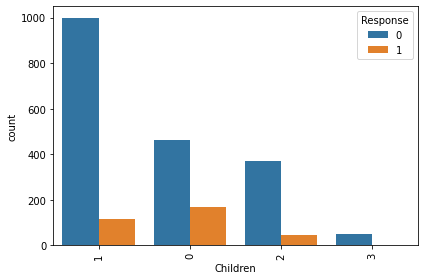

In [26]:
# Children vs Response
sns.countplot(df['Children'], hue=df['Response'], palette=palette, order = df['Children'].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout();

Insight : Customer with no child more likely responding to the campaign

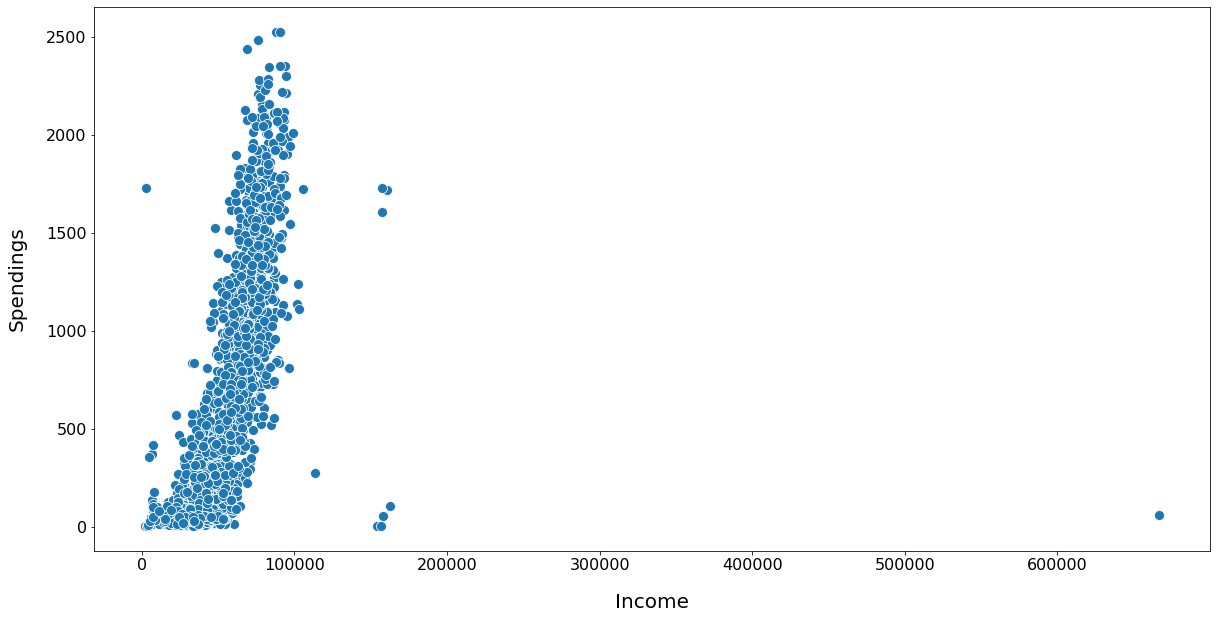

In [27]:
# Income & Spendings relationship
plt.figure(figsize=(20,10))


sns.scatterplot(x=df['Income'], y=df['TotalSpendings'], s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

Insight : there are positive relationship between Income and Spendings, which is make sense where more income the customer most likely spend their money much more. Also there are outlier on the data where income > 120000 (and one customer with income > 600000)

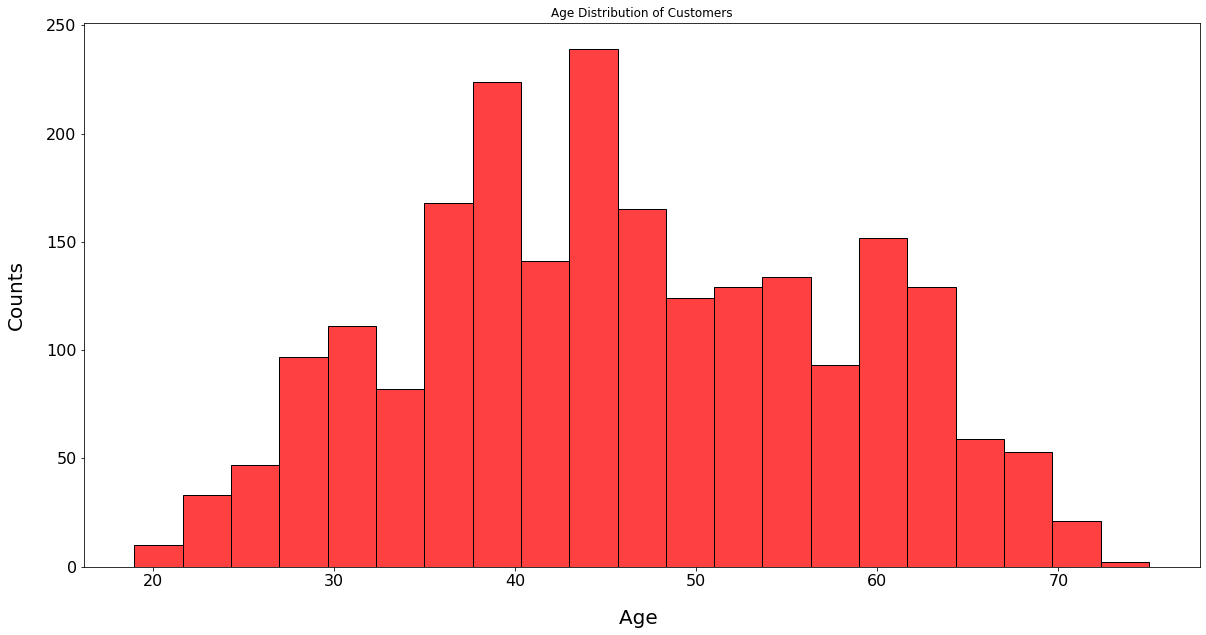

In [28]:
# Age Distribution
plt.figure(figsize=(20,10))
ax = sns.histplot(data = df['Age'], color='red')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

Insight : Customer age distributed normally

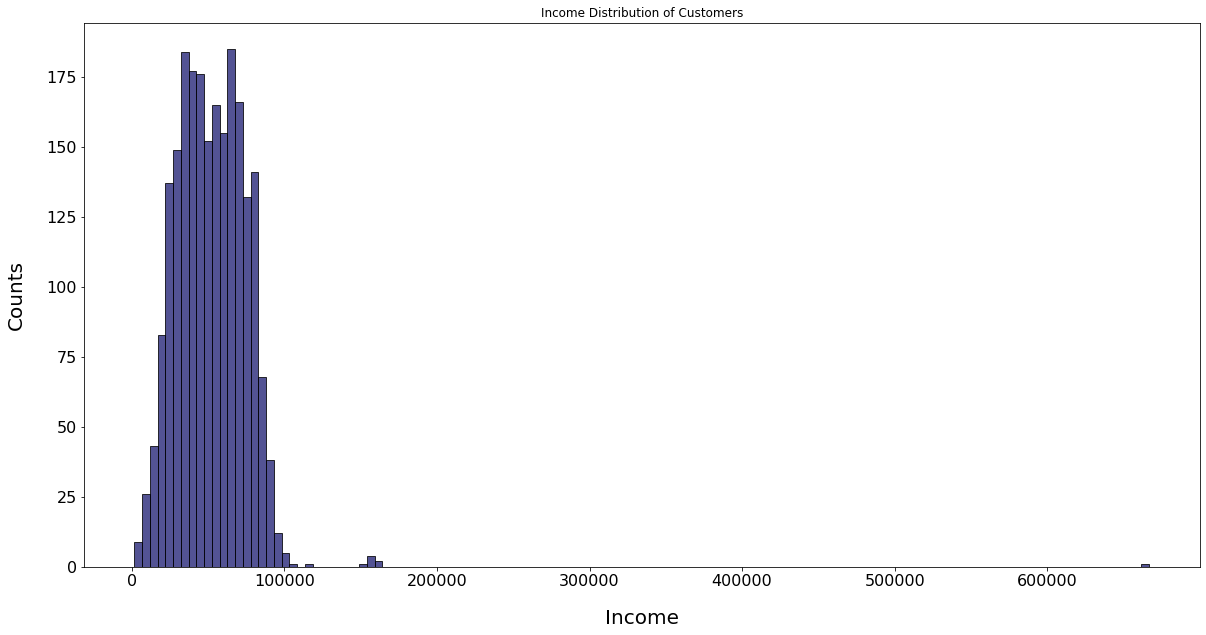

In [29]:
# Income Distribution
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = df['Income'], color = "midnightblue")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

Insight : Customer income distributed normally, hence there aren't outlier on the data

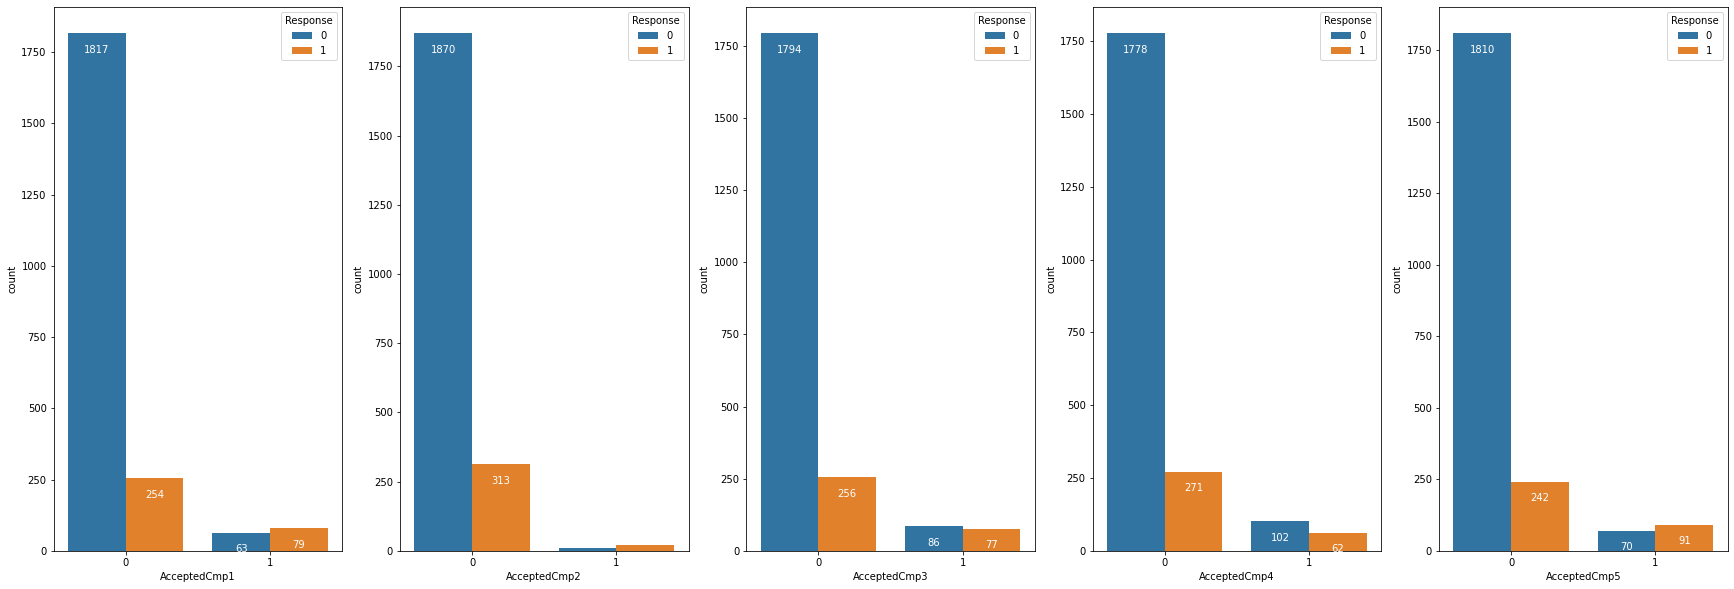

In [30]:
# Find biggest impact campaign
fig, axis = plt.subplots(1,5, figsize=(30, 10))

ax = sns.countplot(df['AcceptedCmp1'], hue=df['Response'], ax=axis[0])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(df['AcceptedCmp2'], hue=df['Response'], ax=axis[1])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(df['AcceptedCmp3'], hue=df['Response'], ax=axis[2])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(df['AcceptedCmp4'], hue=df['Response'], ax=axis[3])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(df['AcceptedCmp5'], hue=df['Response'], ax=axis[4])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)

Insight :
The company did Campaign 4 more than other (164 total customer), hence, the customer more likely to responded for Campaign 5 (91 total customer)

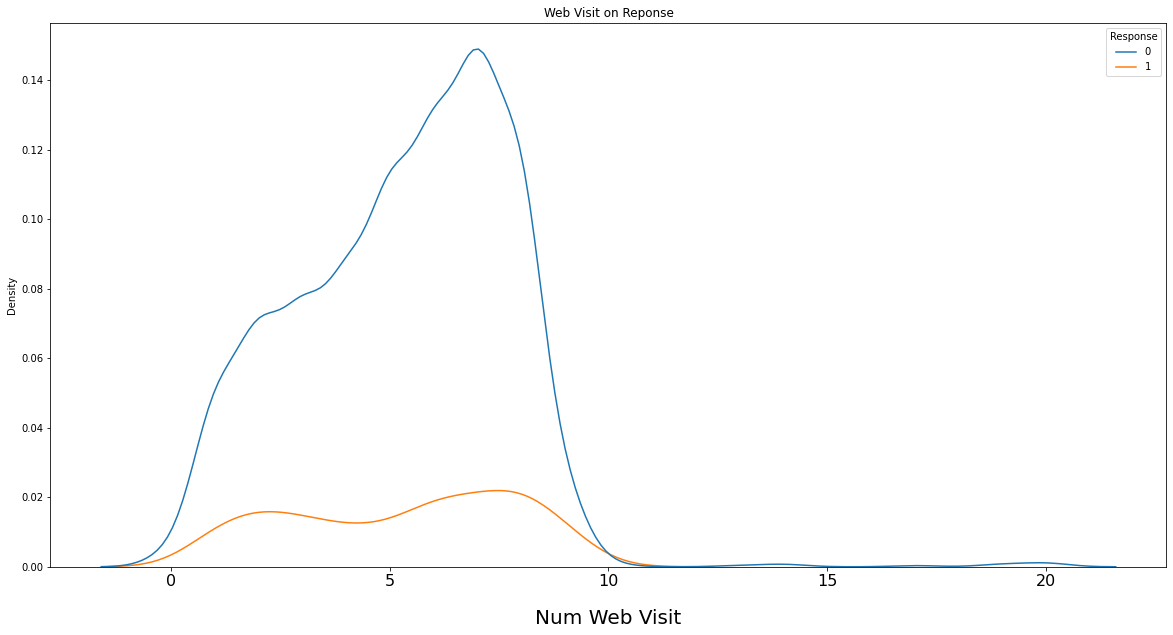

In [31]:
# Web visit density for Response
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(x = df['NumWebVisitsMonth'], hue = df['Response'])
ax.set(title = "Web Visit on Reponse");

plt.xticks( fontsize=16)
plt.xlabel('Num Web Visit', fontsize=20, labelpad=20);

Insight : 
There is an impact on Num Web Visit on Response, where the more customer visit the website, the more people seem not responding to the campaign

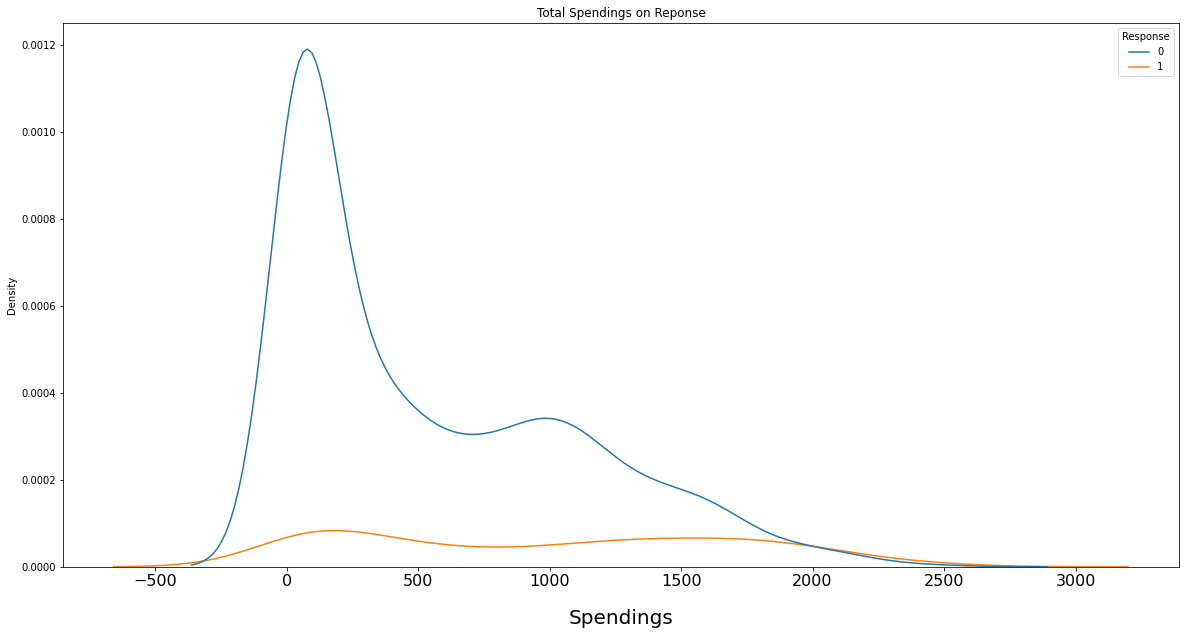

In [32]:
# Total spendings density for Response
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(x = df['TotalSpendings'], hue = df['Response'])
ax.set(title = "Total Spendings on Reponse");

plt.xticks( fontsize=16)
plt.xlabel('Spendings', fontsize=20, labelpad=20);

Insight :
From the plot, we know that the more customer spendings for the company, the customer more likely responded to the campaign

From all of the EDA, we can pull out the summary :
* Marital status didn't have clear impact on customer Response for campaign
* Customer from Graduation degree of Education, have more likely to responding for the campaign and give profit to the company
* Customer with no children at home (despite Partner or Single) have responding to the campaign more often than customer with children
* The campaign number 5 have more number of Responding people than not
* The more user visit on the website the more people not response to the campaign. This could be a problem because that means there is something wrong with our website
* The more user spends on the company, people have a higher chance to respond the campaign. This is somehow make sense because if the people have more spending to the company the more likely that customer is loyal and didn't need any campaign

Then we can produce a customer persona where the people that higher chance to respond the campaign is :
* Graduation degree of Education
* No children at home
* Little time visit on the website
* Little spends on the company

Which is these characteristic somehow match new customer, busy customer, or promo hunter customer. Where these customer mostly will response to campaign. And maybe we could use campaign 5 more often because of the impact for the customer.

## Encoding & Resampling

### Encoding

In [33]:
# Marital_Status encoding
# Change to 1 for all value with partner (Together and Maried) and 0 for all value without partner (Single, Divorced, Widow, Alone, Absurd, YOLO)

df['Marital_Status'] = df['Marital_Status'].replace({'Partner': 1,'Single': 0})

In [34]:
# Education encoding
# Change to 0 for all first cycle ed (Basic & Graduation), 1 for second cycle (Master, 2n Cycle), 2 for third cycle (PhD)
# Source : https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=First%20cycle%20is%20for%20the,offered%20at%20all%20three%20cycles

df['Education'] = df['Education'].replace({'Basic': 0,
                                           'Graduation': 0,
                                           'Master': 1,
                                           '2n Cycle': 1,
                                           'PhD': 2})

### Resampling

In [35]:
# Assign 'Response' column to y 
y = df['Response'].values
# Assign all columns except 'Response' to X
X = df.drop(['Response'], axis = 1).values

In [36]:
# Check dimension
print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (2213, 15)
y shape : (2213,)


In [37]:
# split data to train and test data
# with test size is 30% of overall data
# use stratified sampling
# and set RNG to 1000
X_train_response, X_test_response, y_train_response, y_test_response = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [38]:
# Make a new dataframe using train & test data
train_df_x = pd.DataFrame(X_train_response, columns=df.drop(['Response'], axis = 1).columns)
train_df_y = pd.DataFrame(y_train_response, columns=["Response"])
train_df = pd.concat([train_df_x, train_df_y], axis=1)

test_df_x = pd.DataFrame(X_test_response, columns=df.drop(['Response'], axis = 1).columns)
test_df_y = pd.DataFrame(y_test_response, columns=["Response"])
test_df = pd.concat([test_df_x, test_df_y], axis=1)

In [39]:
train_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
0,0.0,0.0,63810.0,45.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,1.0,1371.0,19.0,0
1,0.0,1.0,82427.0,35.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,49.0,0.0,1456.0,20.0,0
2,0.0,1.0,51651.0,32.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,1.0,433.0,13.0,0
3,1.0,1.0,69661.0,80.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,834.0,22.0,0
4,0.0,0.0,34176.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0,89.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,2.0,0.0,47025.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,2.0,20.0,3.0,0
1545,0.0,1.0,34600.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,2.0,318.0,12.0,1
1546,0.0,1.0,18793.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,1.0,77.0,6.0,0
1547,1.0,1.0,23148.0,83.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,37.0,5.0,0


In [40]:
test_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
0,2.0,0.0,49667.0,35.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,1396.0,20.0,1
1,0.0,1.0,61014.0,17.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,1147.0,16.0,0
2,1.0,1.0,90226.0,26.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0,0.0,2352.0,23.0,0
3,0.0,0.0,93790.0,16.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,45.0,0.0,2349.0,25.0,1
4,2.0,1.0,54549.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,1.0,233.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.0,0.0,79244.0,58.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,22.0,0.0,1216.0,21.0,1
660,2.0,1.0,68682.0,56.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,1598.0,23.0,0
661,2.0,1.0,30396.0,22.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,46.0,1.0,34.0,4.0,1
662,1.0,1.0,35178.0,10.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,44.0,1.0,59.0,4.0,1


## Pre-processing

### Outlier Handling

From EDA we know that there is outlier on `Income` and `Spendings`, we need to remove the outlier from these features

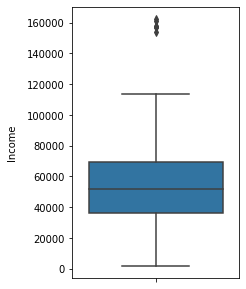

In [41]:
# Checking train_df income outlier
plt.figure(figsize=(3,5))
sns.boxplot(y=train_df['Income']);
plt.ylabel('Income', fontsize=10, labelpad=10);

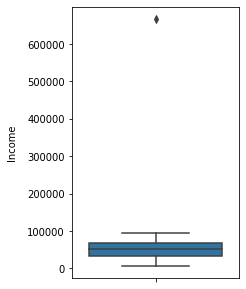

In [42]:
# Checking train_df income outlier
plt.figure(figsize=(3,5))
sns.boxplot(y=test_df['Income']);
plt.ylabel('Income', fontsize=10, labelpad=10);

In [43]:
# Remove outlier on both dataset
train_df = train_df[train_df['Income'] < 120000]
test_df = test_df[test_df['Income'] < 120000]

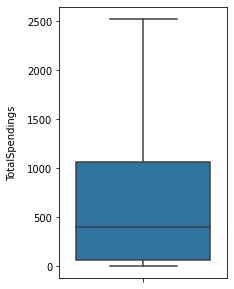

In [44]:
# Checking train_df spendings outlier
plt.figure(figsize=(3,5))
sns.boxplot(y=train_df['TotalSpendings']);
plt.ylabel('TotalSpendings', fontsize=10, labelpad=10);

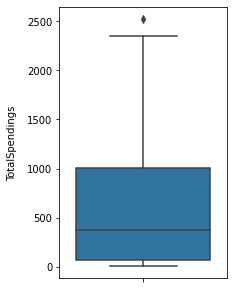

In [45]:
# Checking test_df spendings outlier
plt.figure(figsize=(3,5))
sns.boxplot(y=test_df['TotalSpendings']);
plt.ylabel('TotalSpendings', fontsize=10, labelpad=10);

In [46]:
# Remove outlier on test dataset
test_df = test_df[test_df['TotalSpendings'] < 2400]

### Normalization

Also, there is some feature that have numerical feature with high value. For these we will use normalization to tranform the feature into 0~1 range

In [47]:
# Transform data using normalization
col_trans = df.columns
scaler = MinMaxScaler()
train_df[col_trans] = scaler.fit_transform(train_df[col_trans])
test_df[col_trans] = scaler.fit_transform(test_df[col_trans])

In [48]:
# Check train df
train_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
0,0.0,0.0,0.554266,0.454545,0.40,0.0,1.0,0.0,0.0,0.0,0.0,0.535714,0.333333,0.542063,0.59375,0.0
1,0.0,1.0,0.720483,0.353535,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.535714,0.000000,0.575794,0.62500,0.0
2,0.0,1.0,0.445707,0.323232,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.642857,0.333333,0.169841,0.40625,0.0
3,0.5,1.0,0.606505,0.808081,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.000000,0.328968,0.68750,0.0
4,0.0,0.0,0.289686,0.121212,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.333333,0.033333,0.21875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,1.0,0.0,0.404405,0.060606,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.553571,0.666667,0.005952,0.09375,0.0
1545,0.0,1.0,0.293472,0.080808,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.446429,0.666667,0.124206,0.37500,1.0
1546,0.0,1.0,0.152343,0.141414,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.446429,0.333333,0.028571,0.18750,0.0
1547,0.5,1.0,0.191225,0.838384,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.196429,0.000000,0.012698,0.15625,0.0


In [49]:
# Check descriptive stats for train df
train_df.describe()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
count,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000
mean,0.342088,0.654345,0.447981,0.504147,0.267866,0.073930,0.077821,0.075227,0.063554,0.012970,0.005837,0.486729,0.318418,0.242955,0.397738,0.151102
std,0.404628,0.475736,0.186739,0.294304,0.121090,0.261742,0.267977,0.263843,0.244036,0.113182,0.076199,0.206524,0.249003,0.241101,0.226938,0.358265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.304721,0.252525,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339286,0.000000,0.025099,0.187500,0.000000
50%,0.000000,1.000000,0.443301,0.515152,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.464286,0.333333,0.158333,0.406250,0.000000
75%,0.500000,1.000000,0.600137,0.757576,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.660714,0.333333,0.420040,0.593750,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Check test df
test_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
0,1.0,0.0,0.484517,0.353535,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.773585,0.000000,0.592150,0.612903,1.0
1,0.0,1.0,0.612056,0.171717,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.301887,0.333333,0.485922,0.483871,0.0
2,0.5,1.0,0.940395,0.262626,0.052632,0.0,0.0,0.0,1.0,0.0,0.0,0.754717,0.000000,1.000000,0.709677,0.0
3,0.0,0.0,0.980454,0.161616,0.052632,0.0,1.0,1.0,1.0,0.0,0.0,0.490566,0.000000,0.998720,0.774194,1.0
4,1.0,1.0,0.539390,0.080808,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.830189,0.333333,0.095990,0.290323,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.0,0.0,0.816959,0.585859,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.056604,0.000000,0.515358,0.645161,1.0
660,1.0,1.0,0.698243,0.565657,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.094340,0.000000,0.678328,0.709677,0.0
661,1.0,1.0,0.267914,0.222222,0.315789,1.0,0.0,0.0,0.0,0.0,0.0,0.509434,0.333333,0.011092,0.096774,1.0
662,0.5,1.0,0.321663,0.101010,0.315789,1.0,0.0,0.0,0.0,0.0,0.0,0.471698,0.333333,0.021758,0.096774,1.0


In [51]:
# Check descriptive stats for test df
test_df.describe()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,0.346677,0.622356,0.498455,0.473634,0.225871,0.072508,0.066465,0.066465,0.064955,0.015106,0.016616,0.504703,0.311682,0.243876,0.360589,0.149547
std,0.397016,0.485164,0.227038,0.286650,0.126139,0.259523,0.249282,0.249282,0.246632,0.122066,0.127925,0.226672,0.251473,0.248732,0.224401,0.356896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.311420,0.232323,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339623,0.000000,0.026451,0.161290,0.000000
50%,0.000000,1.000000,0.496431,0.474747,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490566,0.333333,0.154224,0.322581,0.000000
75%,0.500000,1.000000,0.676918,0.727273,0.315789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.679245,0.333333,0.422462,0.548387,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# Reseparate independent and dependent feature of the train-test df
X_train_response = train_df.drop(['Response'], axis=1)
y_train_response = train_df['Response']

X_test_response = test_df.drop(['Response'], axis=1)
y_test_response = test_df['Response']

## Model Selection

For this chance, we would like to select model from three basic models (LogisticRegression,DecisionTree, and RuleFit)

In [53]:
var_name = X_train_response.columns
var_name

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Age', 'Children', 'TotalSpendings',
       'TotalPurchases'],
      dtype='object')

In [54]:
def create_models(seed=1000):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('Logistic Regression', LogisticRegression(random_state=seed)))
    models.append(('Decision Tree', DecisionTreeClassifier(random_state=seed, max_depth = 5)))
    models.append(('RuleFit', SkopeRules(random_state=seed, n_estimators = 10, max_features = 'sqrt', feature_names = var_name)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [55]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train_response, y_train_response).predict(X_test_response)
    # make predictions with the testing data
    predictions = model.predict(X_test_response)
    # calculate accuracy 
    accuracy = accuracy_score(y_test_response, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: Logistic Regression, Accuracy: 0.8685800604229608)
Classifier: Decision Tree, Accuracy: 0.8610271903323263)
Classifier: RuleFit, Accuracy: 0.7598187311178247)


In [56]:
for name,model in models:
  model.fit(X_train_response, y_train_response).predict(X_test_response)
  predictions = model.predict(X_test_response)
  print('='*75)
  print('Classifier: {}'.format(name))
  print(pd.DataFrame(metrics.classification_report(y_test_response, predictions, target_names=['not response','response'], output_dict=True)))

Classifier: Logistic Regression
           not response   response  accuracy   macro avg  weighted avg
precision      0.885113   0.636364   0.86858    0.760738      0.847914
recall         0.971581   0.282828   0.86858    0.627205      0.868580
f1-score       0.926334   0.391608   0.86858    0.658971      0.846367
support      563.000000  99.000000   0.86858  662.000000    662.000000
Classifier: Decision Tree
           not response   response  accuracy   macro avg  weighted avg
precision      0.881686   0.577778  0.861027    0.729732      0.836237
recall         0.966252   0.262626  0.861027    0.614439      0.861027
f1-score       0.922034   0.361111  0.861027    0.641573      0.838150
support      563.000000  99.000000  0.861027  662.000000    662.000000
Classifier: RuleFit
           not response   response  accuracy   macro avg  weighted avg
precision      0.886973   0.285714  0.759819    0.586344      0.797057
recall         0.822380   0.404040  0.759819    0.613210      0.759819

From the summary we got, we will choose Logreg for our model. The reason is that the logistic regression have higher f1 score among all the models (which is suitable metrics for imbalance dataset)

## Modelling (Answer for Advanced question No.2)

### Modelling with best model among 3

In [57]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train_response, y_train_response)

LogisticRegression(random_state=1000)

In [58]:
# check model coefficient
logistic_reg.coef_

array([[ 4.60827853e-01, -1.09633335e+00, -3.39173806e-01,
        -2.46428966e+00,  2.25787270e+00,  1.76492638e+00,
         5.67248313e-01,  1.35781162e+00,  1.11973700e+00,
         7.69555027e-01, -9.80357633e-04,  6.14158044e-03,
        -7.81667930e-01,  2.20405191e+00, -1.63026451e-01]])

In [59]:
# check the intercept
logistic_reg.intercept_

array([-1.55816054])

### Model Evaluation

In [60]:
# predict
pred_result = logistic_reg.predict(X_test_response)
pred_proba_result = logistic_reg.predict_proba(X_test_response)

In [61]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_response, pred_result, target_names=['not response','response'], output_dict=True))

,not response,response,accuracy,macro avg,weighted avg
precision,0.885113,0.636364,0.86858,0.760738,0.847914
recall,0.971581,0.282828,0.86858,0.627205,0.868580
f1-score,0.926334,0.391608,0.86858,0.658971,0.846367
support,563.000000,99.000000,0.86858,662.000000,662.000000


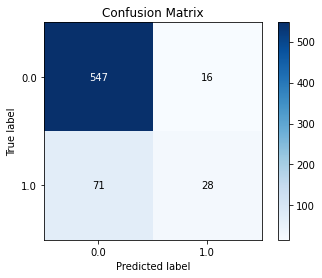

In [62]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_response, pred_result);

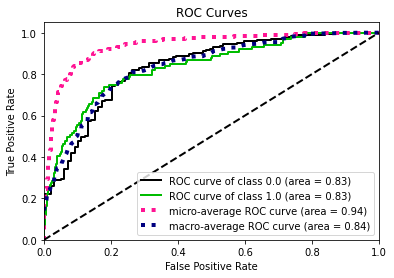

In [63]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test_response, pred_proba_result);

In [64]:
# check f1-score
metrics.f1_score(y_test_response, pred_result)

0.3916083916083916

### Model Interpretation

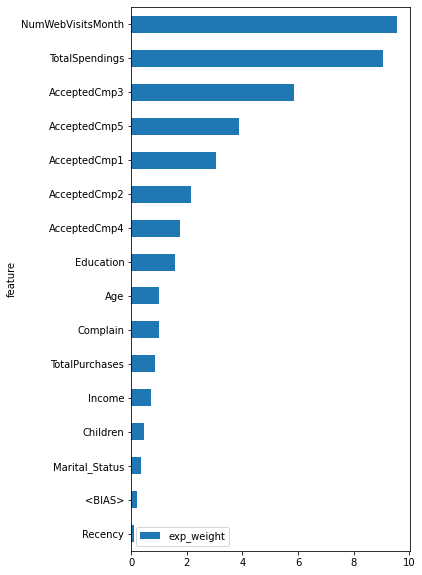

In [65]:
# Weight Plot
var_name = train_df.drop(['Response'], axis = 1).columns.tolist()

# plt.rcParams["figure.figsize"] = (5,10)
eli5.explain_weights_df(
    logistic_reg, feature_names= var_name
).assign(
    # create new weight called exp_weight
    exp_weight = lambda x: x['weight'].map(lambda x: np.exp(x))
).sort_values(
    by = "exp_weight"
).plot(
    x = 'feature',
    y = 'exp_weight',
    kind = 'barh',
    figsize = (5,10)
);

From the weight plot we know that `NumWebVisitMonth`, `TotalSpendings`, and `AcceptedCmp3` are the most impactful feature to determine the predictions of Machine Learning model.

### EDA vs Model

If we turnback to few steps before, on EDA we conclude that Campaign 5 have more impact on the customer response to the campaign. But after we using Machine Learning model, surprisingly the model said the more important feature to determine the prediction is Campaign 3. Let's take a look on plot below, where we see the impact campaign on test df where we do modelling.

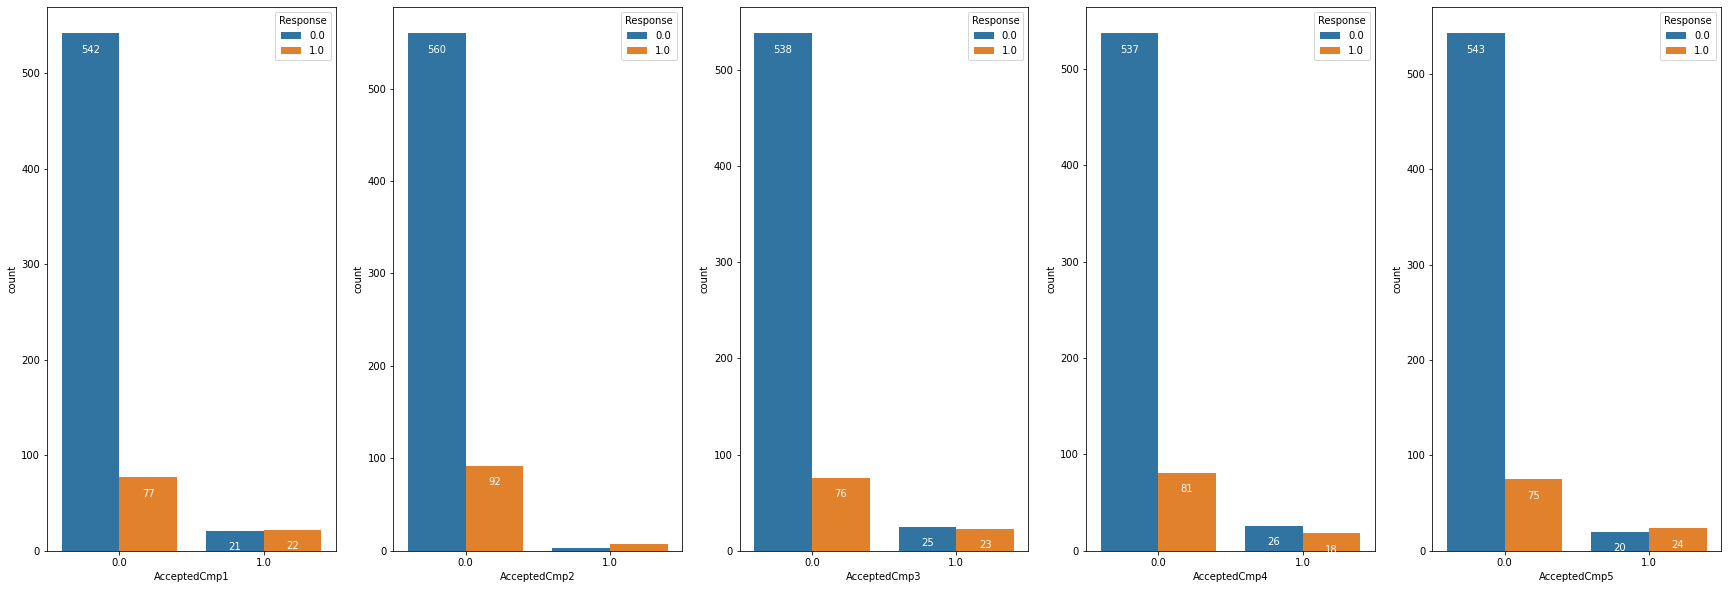

In [67]:
# Find biggest impact campaign
fig, axis = plt.subplots(1,5, figsize=(30, 10))

ax = sns.countplot(test_df['AcceptedCmp1'], hue=test_df['Response'], ax=axis[0])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(test_df['AcceptedCmp2'], hue=test_df['Response'], ax=axis[1])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(test_df['AcceptedCmp3'], hue=test_df['Response'], ax=axis[2])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(test_df['AcceptedCmp4'], hue=test_df['Response'], ax=axis[3])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(test_df['AcceptedCmp5'], hue=test_df['Response'], ax=axis[4])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)

As we can see, the model predicted Campaign 3 are the most impactful to determine the predictions is because we did the machine learning model on test_df where the composition is different from overall dataset. The number of people data are different so there are more people accepted Campaign 3 than Campaign 5. This is totally linear with the argument that we shouldn't using overall customer aggregation for imputation to whole dataset, this because if the data growing up and get more information from the future, the aggregation could be very different from the present data.